<a href="https://colab.research.google.com/github/RahulManavalan/Computational-Physics-/blob/master/Fenics_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !sed -e 's:artful:bionic:' /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list > temp
    !mv temp /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list
    !sed -e 's:artful:bionic:' /etc/apt/sources.list > temp
    !mv temp /etc/apt/sources.list
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics    
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, update_display
import time
import dolfin.common.plotting as fenicsplot 

def plot_compact(u, t, stepcounter, QQ, pl, ax, soltit = "Velocity"): # Compact plot utility function
  if stepcounter == 0:
    pl, ax = plt.subplots(); display(pl); clear_output(); # Plotting setup
  if stepcounter % 5 == 0:
    #u.set_allow_extrapolation(True)
    uEuclidnorm = project(sqrt(inner(u, u)), QQ)
    ax.cla()
    fig = plt.gcf()
    fig.set_size_inches(16, 4)
    plt.subplot(1, 2, 1)
    pp = plot(uEuclidnorm, cmap="coolwarm")
    plt.title("%s at t=%f" % (soltit, t)) # Plot norm of solution
    if t == 0:
      plt.axis(G)
      plt.colorbar(pp, shrink=0.5)
    plt.subplot(1, 2, 2);
    if t == 0:
      plot(QQ.mesh())
      plt.title("Mesh") # Plot mesh
    plt.tight_layout(); dpl = display(pl, display_id="test");
  
  return (pl, ax)

def plot_compact_static(u, QQ, label = "Velocity"): # Compact plot utility function
  pl, ax = plt.subplots();
  uEuclidnorm = project(sqrt(inner(u, u)), QQ); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 4)
  plt.subplot(1, 2, 1); pp = plot(uEuclidnorm, cmap="coolwarm"); plt.title("%s" % (label)) # Plot norm of velocity
  plt.axis(G); plt.colorbar(pp, shrink=0.5); 
  plt.subplot(1, 2, 2);
  plot(QQ.mesh()); plt.title("Mesh") # Plot mesh
  plt.tight_layout(); dpl = display(pl, display_id="test");
  
  return (pl, ax)



In [60]:
xmax , xmin = 4 , 0 ; 
ymax , ymin = 1 , 0 ; 
G = [xmin , xmax , ymin , ymax] 
r = 0.2 
xc = 0.5 ; yc = 0.5 

mresolution = 100 

domain = Rectangle(Point(G[0],G[2]),Point(G[1],G[3])) - Circle(Point(xc,yc),r)
mesh = generate_mesh(domain,mresolution)

V = FunctionSpace(mesh,"CG",1) 
di = V.dim 
x = V.tabulate_dof_coordinates() 
x
# Mark boundary on the mesh

#eps = 1e-5 
##mk = Expression("(((x[0]-xc)*(x[0]-xc))+((x[1]-yc)*(x[1]-yc))) < (r*r) + eps   ? 1. : 0.",xc=xc,yc=yc,r=r, eps=eps, domain=mesh, degree=3)
# Compute Integral
#l = assemble(mk*ds)
#print(l) 

#one = Expression("1.0",domain=mesh,degree=3)
#A = assemble(one*dx) 
#print(A)
#plot(mesh,title="Mesh")

array([[0.        , 0.859375  ],
       [0.        , 0.84375   ],
       [0.01922779, 0.8515625 ],
       ...,
       [4.        , 0.203125  ],
       [4.        , 0.125     ],
       [4.        , 0.09375   ]])

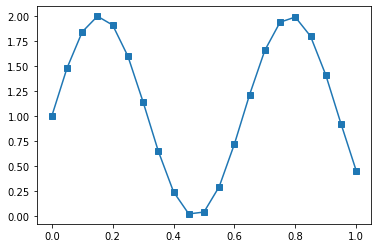

In [75]:
from dolfin import * 
from math import *
import numpy as np  
import matplotlib.pyplot as plt 
a,b = 0,1 
mresolution = 20 
mesh = IntervalMesh(mresolution,a,b)

p_order = 1 
V = FunctionSpace(mesh,"CG",p_order)
dim = V.dim() 
x = V.tabulate_dof_coordinates().reshape(dim)  
indices = np.argsort(x) 

Eu = Function(V) 
Eua = np.array(Eu.vector())

for j in indices:
  Eua[j] = 1 + sin(10*x[j]) 
plt.plot(x[indices],Eua[indices],"-s")

In [96]:
from dolfin import *
from math import *
import numpy as np

# Define domain and mesh
a, b = 0, 1
mresolution = 900
mesh = IntervalMesh(mresolution, a, b)

# Define finite element function space
p_order = 1;
V = FunctionSpace(mesh, "CG", p_order)

# Extract vertices of the mesh 
x = V.tabulate_dof_coordinates() 
indices = np.argsort(x)

# Express the analytical function
u = Expression("1 + x[0]*sin(10*x[0])", degree=5)

# Interpolate u onto V and extract the values in the mesh nodes
Iu = interpolate(u, V)

# Project u onto V
Pu = project(u, V)
u0 = Pu
integral = assemble(u0*dx(mesh))
print(integral)

1.0784669417987498
